In [1]:
# Importar todas las librerías que van a utilizarse

# Análisis de datos
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
import re
from sklearn.preprocessing import LabelEncoder

# Visualización
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

#Algoritmos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import (RepeatedStratifiedKFold, StratifiedKFold,
                                     train_test_split, cross_val_score, cross_validate,
                                     GridSearchCV, KFold)
from sklearn.datasets import make_classification
from sklearn.metrics import (accuracy_score,precision_score,confusion_matrix,recall_score,
                             f1_score, log_loss ,precision_recall_curve,roc_auc_score,
                             make_scorer, average_precision_score,classification_report)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved 
# as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of 
# the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/titanic-machine-learning-from-disaster/gender_submission.csv


**Una vez conocida la ruta, importo los archivos**

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

**Análisis y preproscesamiento de los archivos utilizando profile report**

In [3]:
train_df.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
test_df.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Las columnas Cabin, Embarked, Ticket y Name poseen valores string, por lo que serán analizadas, para luego convertir dichos valores en valores float. De esa manera será menos costoso para los algoritmos trabajar sobre ellos.**

In [5]:
le=LabelEncoder()

Tickets = train_df['Ticket']
train_df['Tickets2'] = Tickets.str.isalnum()
train_df['Tickets2'] = le.fit_transform(train_df['Tickets2'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Tickets2     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
Tickets = test_df['Ticket']
test_df['Tickets2'] = Tickets.str.isalnum()
test_df['Tickets2'] = le.fit_transform(test_df['Tickets2'])

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Tickets2     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
train_df[["Tickets2", "Survived"]].groupby(['Tickets2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Tickets2  Survived
0         0  0.384956
1         1  0.383459

> Del análisis de la columna Ticket, puede comprobarse que no existen diferencias significativas de acuerdo a la supervivencia en función al tipo de ticket impreso. 

In [8]:
Cabins = train_df['Cabin']
train_df['CabinTrue'] = Cabins.notnull()
train_df['CabinTrue'] = le.fit_transform(train_df['CabinTrue'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Tickets2     891 non-null    int64  
 13  CabinTrue    891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [9]:
Cabins = test_df['Cabin']
test_df['CabinTrue'] = Cabins.notnull()
test_df['CabinTrue'] = le.fit_transform(test_df['CabinTrue'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Tickets2     891 non-null    int64  
 13  CabinTrue    891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [10]:
train_df[["CabinTrue", "Survived"]].groupby(['CabinTrue'], as_index=False).mean().sort_values(by='Survived', ascending=False)

CabinTrue  Survived
1          1  0.666667
0          0  0.299854

> Del análisis de la columna Cabin, se desprende que, en aquellos pasajeros en los cuales dicha columna ofrece un valor, el porcentaje de supervivencia es mucho mayor.
>Al crearse una columna CabinTrue en su reemplazo, la columna Cabin ya no es necesaria.

**Luego del análisis se quitan del dataset las columnas Cabin y Ticket**

In [11]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.drop('Ticket',axis=1,inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Tickets2     891 non-null    int64  
 11  CabinTrue    891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [12]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Tickets2     418 non-null    int64  
 10  CabinTrue    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**A continunación se analiza la columna Name, en busca de títulos nobiliarios o cualquier indicio de clase social en los nombres de los pasajeros**

In [13]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [14]:
#Ahora pueden clasificarse los títulos de acuerdo a su nivel de supervivencia, clasificando a los minoritarios como #Rare

train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [15]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(test_df['Title'], test_df['Sex'])

Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2

In [16]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

pd.crosstab(test_df['Title'], test_df['Sex'])

Sex     female  male
Title               
Master       0    21
Miss        79     0
Mr           0   240
Mrs         72     0
Rare         1     5

**Como existe una correlación clara, se pueden convertir los valores "string" a valores "float", de esa manera se crea una columna con datos nuevos a partir de los ya existentes.**

In [17]:
le = LabelEncoder()
test_df["Title"]= le.fit_transform(test_df["Title"])
train_df["Title"]= le.fit_transform(train_df["Title"])
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Tickets2  CabinTrue  Title  
0      0   7.2500        S         0          0      2  
1      0  71.2833        C         0          1      3  
2      0   7.9250        S         0          0      1  
3      0  53.1000        S         1          1      3  
4      0   8.0500        S         1          0      2

In [18]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked  Tickets2  CabinTrue  Title  
0  34.5      0      0   7.8292        Q         1          0      2  
1  47.0      1      0   7.0000        S         1          0      3  
2  62.0      0      0   9.6875        Q         1          0      2  
3  27.0      0      0   8.6625        S         1          0      2  
4  22.0      1      1  12.2875        S         1          0      3

**#Ahora que se reemplazó, puede quitarse la columna 'Name'**

In [19]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


**Se estudia la supervivencia de acuerdo a la tarifa pagada al abordar**

In [22]:
train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
..        ...       ...
103   15.5500       0.0
180   47.1000       0.0
179   46.9000       0.0
178   42.4000       0.0
124   21.0750       0.0

[248 rows x 2 columns]

**Para un mejor análisis se puede separar fare en bandas**

In [23]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

le = LabelEncoder()
train_df["FareBand"]= le.fit_transform(train_df["FareBand"])

train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0         0  0.197309
1         1  0.303571
2         2  0.454955
3         3  0.581081

**En el archivo test_df se completa la columna 'Fare' utilizando el promedio de dicha columna**

In [24]:
test_df = test_df.fillna(test_df['Fare'].mean())

**Luego se crea la columna 'FareBand' de forma que coincida con el archivo train_df**

In [25]:
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)

le = LabelEncoder()
test_df["FareBand"]= le.fit_transform(test_df["FareBand"])

pd.crosstab(test_df['FareBand'], test_df['Sex'])

Sex       female  male
FareBand              
0             30    84
1             26    70
2             41    64
3             55    48

**Reemplazar los valores perdidos en Embarked, en train_df, con el valor más común**

In [26]:
common_value = train_df['Embarked'].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(common_value)
#Corroboro la existencia de valores nulos
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 90.6+ KB


**Se reemplazan los valores en 'Sex' y 'Embarked' por valores numéricos**

In [27]:
le = LabelEncoder()

train_df["Sex"]= le.fit_transform(train_df["Sex"])
train_df["Embarked"]= le.fit_transform(train_df["Embarked"])
#Imprimo para corroborar
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [28]:
le = LabelEncoder()

test_df["Sex"]= le.fit_transform(test_df["Sex"])
test_df["Embarked"]= le.fit_transform(test_df["Embarked"])
#Imprimo para corroborar
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
 11  FareBand     418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


**Análisis de supervivencia de acuerdo al sexo**

In [29]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0    0  0.742038
1    1  0.188908

> Existe una mayor supervivencia en el sexo femenino(0)

**Supervivencia de acuerdo a la Clase**

In [30]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

> El porcentaje de supervivencia desciende a medida que baja la clase de los pasajeros.

**Supervivencia de acuerdo al puerto de embarque y a la clase**

In [31]:
train_df[['Survived', 'Pclass','Embarked']].groupby(['Embarked','Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

Embarked  Pclass  Survived
2         0       3  0.378788
5         1       3  0.375000
8         2       3  0.189802
1         0       2  0.529412
4         1       2  0.666667
7         2       2  0.463415
0         0       1  0.694118
3         1       1  0.500000
6         2       1  0.589147

> No existen diferencias significativas

**Supervivencia de acuerdo a SibSp**

In [32]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

**Supervivencia de acuerdo a Parch**

In [33]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

> Aquellos individuos con familia tienden a sobrevivir más

**Se crea la columna 'Family' a partir de 'SibSp' y 'Parch'**

In [34]:
train_df['Family'] = train_df['SibSp'] * train_df['Parch']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
 13  Family       891 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.6 KB


In [35]:
test_df['Family'] = test_df['SibSp'] * test_df['Parch']
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
 11  FareBand     418 non-null    int64  
 12  Family       418 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 42.6 KB


In [36]:
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Family  Survived
2       2  0.692308
1       1  0.596491
0       0  0.373832
5       5  0.333333
6       6  0.333333
7       8  0.333333
4       4  0.125000
3       3  0.100000
8      10  0.000000
9      16  0.000000

**Se crea la column'Alone' para aquellos que viajaron solos**

In [37]:
train_df['Alone'] = 0
train_df.loc[train_df['Family'] == 0, 'Alone'] = 1

train_df[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

Alone  Survived
0      0  0.436620
1      1  0.373832

In [38]:
test_df['Alone'] = 0
test_df.loc[test_df['Family'] == 0, 'Alone'] = 1

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
 11  FareBand     418 non-null    int64  
 12  Family       418 non-null    int64  
 13  Alone        418 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 45.8 KB


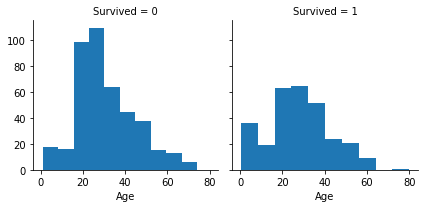

In [39]:
#Supervivencia de acuerdo a la edad de los pasajeros
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

**Trabajo sobre los valores perdidos de edad de los pasajeros**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


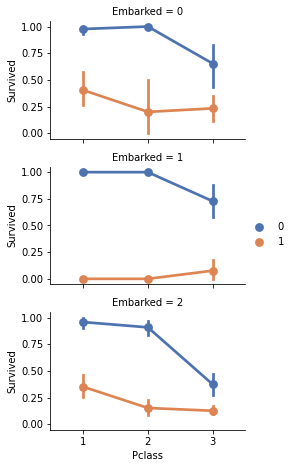

In [40]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


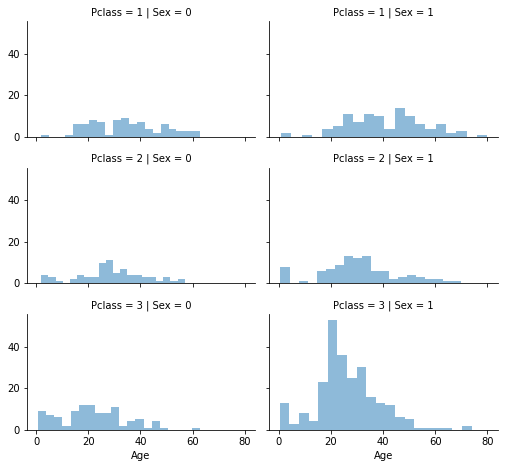

In [41]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Los valores faltantes en 'Age' se reemplazarán de acuerdo al sexo y a la clase de los pasajeros, de esa manera se mantendrán más fieles a la dispersión original** 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

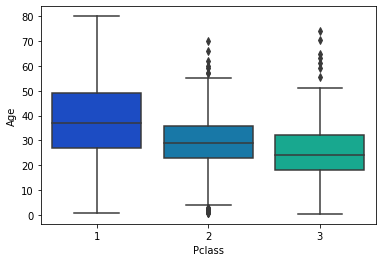

In [42]:
#Estudio la dispersión de los valores de Age con respecto a Pclass
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [43]:
#Calculo y almaceno la media para cada Pclass y Sex
combine =[train_df, test_df]
for dataset in combine:
    Agemeans = round(dataset.groupby(['Pclass','Sex'])['Age'].mean(),0)
print(Agemeans)

Pclass  Sex
1       0      41.0
        1      40.0
2       0      25.0
        1      31.0
3       0      27.0
        1      28.0
Name: Age, dtype: float64


In [44]:
#Ahora, viendo el promedio de edades en cada una de las clases se pueden reemplazar los valores perdidos
#(Haerlo para el nuevo análisis propuesto)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]

    
    if pd.isnull(Age):

        if Pclass == 1 and Sex == 0:
            return 41
        if Pclass == 1 and Sex == 1:
            return 40

        if Pclass == 2 and Sex == 0:
            return 25
        if Pclass == 2 and Sex == 1:
            return 31

        if Pclass == 3 and Sex == 0:
            return 27
        if Pclass == 3 and Sex == 1:
            return 28

    else:
        return Age

train_df['Age'] = train_df[['Age','Pclass','Sex']].apply(impute_age,axis=1)
test_df['Age'] = test_df[['Age','Pclass','Sex']].apply(impute_age,axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
 13  Family       891 non-null    int64  
 14  Alone        891 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 104.5 KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
 11  FareBand     418 non-null    int64  
 12  Family       418 non-null    int64  
 13  Alone        418 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 45.8 KB


**Puede estudiarse ahora la supervivencia de acuerdo a las bandas etareas, creando una nueva columna que los agrupe de acuerdo a las mismas**

In [46]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 20)

le=LabelEncoder()
train_df["AgeBand"]= le.fit_transform(train_df["AgeBand"])

train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0         0  0.675000
1         1  0.642857
2         2  0.266667
3         3  0.483871
4         4  0.341772
5         5  0.367347
6         6  0.295964
7         7  0.397849
8         8  0.479452
9         9  0.333333
10       10  0.477273
11       11  0.342857
12       12  0.482759
13       13  0.437500
14       14  0.384615
15       15  0.363636
16       16  0.000000
17       17  0.000000
18       18  0.000000
19       19  1.000000

In [47]:
test_df['AgeBand'] = pd.cut(test_df['Age'], 20)

le=LabelEncoder()
test_df["AgeBand"]= le.fit_transform(test_df["AgeBand"])

test_df[['AgeBand', 'Sex']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand       Sex
0         0  0.363636
1         1  1.000000
2         2  0.571429
3         3  0.666667
4         4  0.482759
5         5  0.595238
6         6  0.711538
7         7  0.622222
8         8  0.714286
9         9  0.657407
10       10  0.888889
11       11  0.578947
12       12  0.625000
13       13  0.666667
14       14  0.636364
15       15  0.166667
16       16  0.625000
17       17  1.000000
18       18  0.000000

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
 13  Family       891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  AgeBand      891 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 111.5 KB


**Test de modelos, para definir cual utilizar**

In [49]:
df = train_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Tickets2     891 non-null    int64  
 10  CabinTrue    891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FareBand     891 non-null    int64  
 13  Family       891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  AgeBand      891 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 111.5 KB


In [50]:
# SPLIT DATASET
def split_x_y(df):
    '''Given a dataframe, it splits the feature variables from the predicting column. It returns X and Y dataframe.'''
    X = df.drop('Survived',axis=1)
    y = df.Survived
    return X , y

In [51]:
def load_models():
    '''Loads and returns logistic regression, gradient boosting, random forest␣
    ,→classifier, XGBoost Classifier and MLP Classifier.'''
    log = LogisticRegression(max_iter = 2500, random_state = 3)
    gbc = GradientBoostingClassifier(random_state = 3)
    rfc = RandomForestClassifier(n_estimators= 300, random_state = 3)
    xg_reg = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3,
                           learning_rate = 0.1, max_depth = 5, n_estimators = 300, random_state = 3)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2),random_state=1)
    
    return log, gbc , rfc , xg_reg , clf

In [52]:
def Metrics(ytest,pred):
    '''Given a vector of predictions and real values, it calculates the accuracy, precision, F1, 
    recall, average precision, and it returns a list of all of metrics and the confusion matrix.'''
    accuracy = accuracy_score(ytest,pred)
    precision = precision_score(ytest,pred)
    F1 = f1_score(ytest,pred)
    recall = recall_score(ytest,pred)
    average_precision = average_precision_score(ytest,pred)
    metrics = [accuracy, F1, recall, precision, average_precision ]
    confusion = confusion_matrix(ytest,pred)
    return metrics, confusion

 
 Algorithm Logistic Regression: 



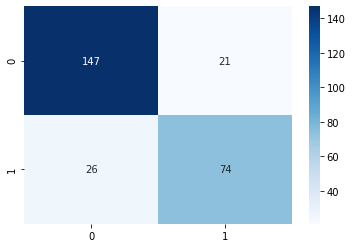

 
 Algorithm Gradient Boost: 



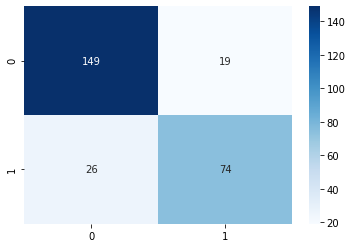

 
 Algorithm Random Forest: 



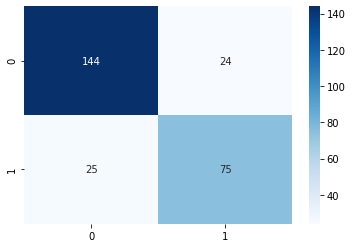

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:42] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


 
 Algorithm XGBoost: 



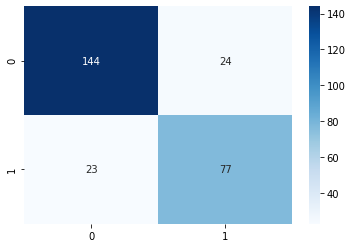

 
 Algorithm Neural Net: 



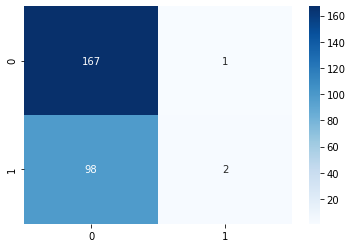

[[0.8246268656716418, 0.7589743589743589, 0.74, 0.7789473684210526, 0.6734359780047132], [0.832089552238806, 0.7668393782383419, 0.74, 0.7956989247311828, 0.6858321296742096], [0.8171641791044776, 0.7537688442211055, 0.75, 0.7575757575757576, 0.6614654002713704], [0.8246268656716418, 0.7661691542288558, 0.77, 0.7623762376237624, 0.6728505984926851], [0.6305970149253731, 0.038834951456310676, 0.02, 0.6666666666666666, 0.3790049751243781]]


accuracy        F1  recall  precision  average_precision
Logistic Regression  0.824627  0.758974    0.74   0.778947           0.673436
Gradient Boost       0.832090  0.766839    0.74   0.795699           0.685832
Random Forest        0.817164  0.753769    0.75   0.757576           0.661465
XGBoost              0.824627  0.766169    0.77   0.762376           0.672851
Neural Net           0.630597  0.038835    0.02   0.666667           0.379005

In [53]:
log, gbc , rfc , xg_reg , clf = load_models()
algorithms=[log,gbc,rfc,xg_reg,clf]
names=['Logistic Regression','Gradient Boost','Random Forest','XGBoost','Neural Net']
rows = []
for i, algorithm in enumerate(algorithms):
    name = names[i]
    X , y = split_x_y(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
    model = algorithm.fit(X_train, y_train)
    predictions = model.predict(X_test)
    metrics , confusion = Metrics(y_test,predictions)
    print(f' \n Algorithm {name}: \n')
    sns.heatmap(confusion , annot=True,fmt='d', cmap='Blues')
    plt.show()
    
    rows.append(metrics)
print(rows)
results = pd.DataFrame(rows, columns = ['accuracy', 'F1', 'recall','precision', 'average_precision'], 
                       index = names)
results

**A continuación se repite el testeo de modelos, ahora utilizando oversampling para aumentar los valores minoritarios**

In [54]:
df[df.Survived==0].shape

(549, 16)

In [55]:
df[df.Survived==1].shape

(342, 16)

In [56]:
#Survived==1 es la clase minoritaria
def oversampling(X_train, y_train):
    '''Receives two dataframes (X_train and y_train) and performs oversampling of␣
    ,→the minority class using the bootstrap method with replacement.
    It returns the dataframes oversampled and a new randomly shuffle dataframed␣
    ,→merged with the oversampling performed.'''
    
    # concatenate our training data back together
    X = pd.concat([X_train, y_train], axis=1)
    
    # Separate minority and majority classes
    not_survive = X[X.Survived==0]
    survive = X[X.Survived==1]
    
    # Oversampling the minority class
    survive_upsampled = resample(survive,
                                 replace=True,
                                 n_samples=len(not_survive),
                                 random_state=27)
    
    # Combine majority and upsampled minority
    upsampled = pd.concat([survive, survive_upsampled])
    
    # Shuffle dataframe rows
    upsampled = upsampled.sample(frac=1, random_state=42)
    
    # trying logistic regression again with the balanced dataset
    X_train = upsampled.drop('Survived', axis=1)
    y_train = upsampled.Survived
    new_df = upsampled
    return new_df , X_train, y_train


In [57]:
log, gbc , rfc , xg_reg , clf = load_models()
algorithms=[log, gbc, rfc, xg_reg, clf]
names=['Logistic','GradientBoost','RandomForest','Xgboost','Neunet']
rows = []
for algorithm in algorithms:
    new_df, X_train, y_train = oversampling(X_train, y_train)
    X = new_df.drop('Survived', axis=1)
    y = new_df['Survived']
    X , y = split_x_y(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = algorithm.fit(X_train, y_train)
    predictions = model.predict(X_test)
    metrics , confusion = Metrics(y_test,predictions)
    rows.append(metrics)
    
results = pd.DataFrame(rows, columns = ['accuracy', 'F1', 'recall','precision', 'average_precision'], 
                       index = names)
results

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[15:24:47] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


accuracy        F1  recall  precision  average_precision
Logistic       0.824627  0.758974    0.74   0.778947           0.673436
GradientBoost  0.832090  0.766839    0.74   0.795699           0.685832
RandomForest   0.817164  0.753769    0.75   0.757576           0.661465
Xgboost        0.824627  0.766169    0.77   0.762376           0.672851
Neunet         0.630597  0.038835    0.02   0.666667           0.379005

**Debido a la estructura de los datos se decidión utilizar regresión logística, sin aumentar la categoría minoritaria con oversampling, para evitar el overfit**

**A continuación se testea el uso de smote en la regresión logística**

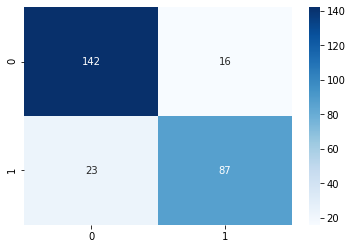

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       158
           1       0.84      0.79      0.82       110

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.85      0.85      0.85       268



In [58]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], test_size=0.30, 
                                                    random_state=150)
smt = SMOTE(random_state = 3)
X_train, y_train = smt.fit_resample(X_train, y_train)
lm = LogisticRegression(max_iter=1500, random_state= 150)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

metrics , confusion = Metrics(y_test,predictions)
sns.heatmap(confusion , annot=True,fmt='d', cmap='Blues')
plt.show()

print(classification_report(y_test,predictions))

**Como existe una clara mejoría, se sugiere utilizar regresión logística aplicando SMOTE, para expandir la cantidad de valores**

In [59]:
#Corroboro los espacios vacíos en test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Tickets2     418 non-null    int64  
 9   CabinTrue    418 non-null    int64  
 10  Title        418 non-null    int64  
 11  FareBand     418 non-null    int64  
 12  Family       418 non-null    int64  
 13  Alone        418 non-null    int64  
 14  AgeBand      418 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 49.1 KB


In [60]:
#Seteo los valores 
X_train2 = train_df.drop("Survived", axis=1)
y_train2 = train_df["Survived"]
X_test2 = test_df

In [61]:
#Modelo de regresión logística utilizando SMOTE

smt = SMOTE(random_state = 3)
X_train2, y_train2 = smt.fit_resample(X_train2, y_train2)

logmodel = LogisticRegression(max_iter=1500)
logmodel.fit(X_train2,y_train2)
predictions2 = logmodel.predict(X_test2)

print(predictions2)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


**Exportar los resultados**

In [62]:
#Exportar datos en un csv
final_data = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions2})
file = 'Final_prediction.csv'
final_data.to_csv(file,index=False)